## 1. Debugging with `pdb`

Have a look at the code below, it has a short docstring at the top, describing what it is supposed to do. However there are 2 bugs hidden in there. Use `%debug` (at best post mortem) to try to find the bugs. Then fix them (without changing the `#definitions and data-creation` block).

In [1]:
"""
This code initializes a DataFrame that holds a time axis t and 
sin(t), cos(t) as data in its columns. It then uses the two functions 
shift() and superposition() to shift cos(t) by pi/2 and add it to 
sin(t), which should result in 0 for all t.

The result is plotted.
"""

import numpy as np
import pandas as pd


def shift(t, func, shift=0):
    """
    Takes x, y (t, func) and returns y(t + shift).
    t: array-like or series
    f: function-object
    """
    x, y = t, func
    
    return y(x + shift)


def superposition(data_1, data_2):
    """
    Takes y1, y2 (data_1, data_2) and returns y1 + y2
    y1: array-like or series
    y2: array-like or series
    """
    y1, y2 = data_1, data_1
    
    return y1 + y2


# definitions and data-creation
n = 11
t = np.linspace(0, 1, n)  # time-axis
data = np.array([t, np.sin(t), np.cos(t)]).T  # (rows, columns) = (n, 3)
labels = ['time', 'sin', 'cos']

signal = pd.DataFrame(data, columns=labels)

# Calculations
cos_shift = shift(signal.time, signal.cos, shift=np.pi/2)
cos_plus_sin = superposition(signal.sin, cos_shift)

# Plotting
ax = cos_plus_sin.round().plot(label='Result')

# Plotting of expected result
ax.plot(np.zeros(n), 'r--', label='Expectation')
ax.legend()

TypeError: 'Series' object is not callable

In [ ]:
%debug

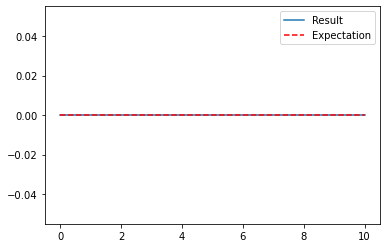

In [3]:
def superposition(data_1, data_2):
    y1, y2 = data_1, data_2
    
    return y1 + y2

# Calculations
cos_shift = shift(signal.time, np.cos, shift=np.pi/2)
cos_plus_sin = superposition(signal.sin, cos_shift)

# Plotting
ax = cos_plus_sin.round().plot(label='Result')

# Plotting of expected result
ax.plot(np.zeros(n), 'r--', label='Expectation')
ax.legend()

## 2. Profiling and Optimization

Have a look at the code below. Don't worry about what the results mean, as they're only there for demonstration.
1. Profile the code. Try to find the bottlenecks and narrow the down to one single line.
2. Optimize the code (without changing the #definitions and data-creation block).

In [4]:
import numpy as np
import pandas as pd


def dot(data_1, data_2):
    """
    Takes y1, y2 (data_1, data_2) and calculates the dot product
    (scalar product).
    y1: array-like or series
    y2: array-like or series
    """
    y1, y2 = data_1, data_2
    
    res = 0
    for e1, e2 in zip(y1, y2):
        res = res + (e1 * e2)
    
    return res


def mean(n, data):
    """
    Takes n, y (n, data) and calculates data mean value.
    n: int
    y: array-like or series
    """
    res = 0
    
    for e in data:
        res = res + e
    
    return res / n


# definitions and data-creation
n = 2000
t = np.linspace(0, 1, n)  # time-axis
data = np.array([t, np.sin(t), np.cos(t)]).T  # (rows, columns) = (n, 3)
labels = ['time', 'sin', 'cos']

signal = pd.DataFrame(data, columns=labels)

# Calculations
dot_res = dot(signal.sin, signal.cos) / n
cos_mean_res = mean(n, signal.cos)
sin_mean_res = mean(n, signal.sin)

# Compare results
print(dot_res, cos_mean_res, sin_mean_res)

773.5789408050574 0.8414353073525439 0.4596782034491702


In [5]:
from timeit import default_timer as dt

# Calculations and profiling
t0 = dt()
dot_res = dot(signal.sin, signal.cos) / n
t1 = dt()
cos_mean_res = mean(n, signal.cos)
t2 = dt()
sin_mean_res = mean(n, signal.sin)
t3 = dt()

# Compare results
print(dot_res, cos_mean_res, sin_mean_res)
print(t1 - t0, t2 - t1, t3 - t2)

773.5789408050574 0.8414353073525439 0.4596782034491702
0.3728122259999509 0.00023484400117013138 0.00020616499932657462


In [6]:
from timeit import default_timer as dt

# Calculations and profiling
t0 = dt()
dot_res = np.dot(signal.sin.to_numpy(), signal.cos.to_numpy()) / n
t1 = dt()
cos_mean_res = np.mean(signal.cos.to_numpy())
t2 = dt()
sin_mean_res = mean(n, signal.sin)  # for comparison
t3 = dt()

# Compare results
print(dot_res, cos_mean_res, sin_mean_res)
print(t1 - t0, t2 - t1, t3 - t2)

0.35397332344275195 0.8414353073525443 0.4596782034491702
0.00034635799966054037 0.000279985000815941 0.000752665999243618
